# CSCL 2023 Automated Multi-Dimensional Analysis of Peer Feedback in Middle School Mathematics
## Creative#4. PROMPT ENGINEERING_code

In [ ]:
#Using an updated version of the Universal Sentence Encoder for potentially better text embeddings.
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
#v4 + original code.

# import data
df = pd.read_csv("Annotations_final.csv").fillna(0)

# extract features as X
X = df[['annotation_text','created_by']]

# extract the prediction variable as y
y = df.comment_process # CHANGE y HERE

# set up storage arrays for each round of validation
roc_auc_scores = np.array([])
pred = pd.DataFrame()

# split, train, test and store performance metrics
for train_index, test_index in gkf.split(X, y, groups=groups):

    X_train = X.iloc[train_index].drop(['created_by'], axis=1)
    X_test = X.iloc[test_index].drop(['created_by'], axis=1)
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    # train classifier on this round of training group
    training_embeddings = embed(X_train.annotation_text.to_list())
    
    model = Sequential()
    model.add(Dense(12, input_shape=(512,), activation='relu')) 
    model.add(Dense(8, activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics = ['acc'])
    
    num_epochs = 30
    batch_size = 10
    
   
    model.fit(
        training_embeddings, 
        y_train, 
        epochs=num_epochs, 
        validation_split=0.1,
        shuffle=True, 
        batch_size=batch_size)
    
    # test classifier on this round of testing group
    testing_embeddings = embed(X_test.annotation_text.to_list())
    predictions = model.predict(testing_embeddings)
    
    # compute some metrics and store them for averaging later on
    roc_auc_scores = np.append(roc_auc_scores, roc_auc_score(y_test, predictions))

    
# print mean scores for the 5-fold CV
print("average roc_auc score: ", np.round(roc_auc_scores.mean(), 3))
print("stdv roc_auc score: ", np.round(roc_auc_scores.std(), 3))
print("max roc_auc score: ", np.round(roc_auc_scores.max(), 3))

#average roc_auc score:  0.891
#stdv roc_auc score:  0.039
#max roc_auc score:  0.951

In [ ]:
#v4 + fine-tuning
#ChatGPT4

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
# import data
df = pd.read_csv("Annotations_final.csv").fillna(0)

# extract features as X
X = df[['annotation_text','created_by']]

# extract the prediction variable as y
y = df.comment_process# CHANGE y HERE

# set up storage arrays for each round of validation
roc_auc_scores = np.array([])
pred = pd.DataFrame()

# split, train, test and store performance metrics
for train_index, test_index in gkf.split(X, y, groups=groups):

    X_train = X.iloc[train_index].drop(['created_by'], axis=1)
    X_test = X.iloc[test_index].drop(['created_by'], axis=1)
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

    # train classifier on this round of training group
    training_embeddings = embed(X_train.annotation_text.to_list())
    
    model = Sequential()
    model.add(Dense(128, input_shape=(512,), activation='relu')),        
    Dropout(0.5),
    model.add(Dense(64, activation='relu')),
    Dropout(0.5),
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics = ['acc'])
    
    num_epochs = 10
    batch_size = 32
    
   
    model.fit(
        training_embeddings, 
        y_train, 
        epochs=num_epochs, 
        validation_split=0.1,
        shuffle=True, 
        batch_size=batch_size)
    
    # test classifier on this round of testing group
    testing_embeddings = embed(X_test.annotation_text.to_list())
    predictions = model.predict(testing_embeddings)
    
    # compute some metrics and store them for averaging later on
    roc_auc_scores = np.append(roc_auc_scores, roc_auc_score(y_test, predictions))

    
# print mean scores for the 5-fold CV
print("average roc_auc score: ", np.round(roc_auc_scores.mean(), 3))
print("stdv roc_auc score: ", np.round(roc_auc_scores.std(), 3))
print("max roc_auc score: ", np.round(roc_auc_scores.max(), 3))

#average roc_auc score:  0.915
#stdv roc_auc score:  0.026
#max roc_auc score:  0.965

In [ ]:
#Enhanced Preprocessing of Text Data
#ChatGPT4

import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK datasets
nltk.download('wordnet')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv("Annotations_final.csv").fillna('')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize by splitting the text into words
    words = text.split()

    # Lemmatize and remove stop words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join the words back into one string
    return ' '.join(words)

# Apply preprocessing to each text in the dataset
df['processed_text'] = df['annotation_text'].apply(preprocess_text)
df['processed_text'].head()

In [ ]:
#keep the neural network architecture unchanged as per the 'CSCL23_feedback detectors.ipynb' file
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

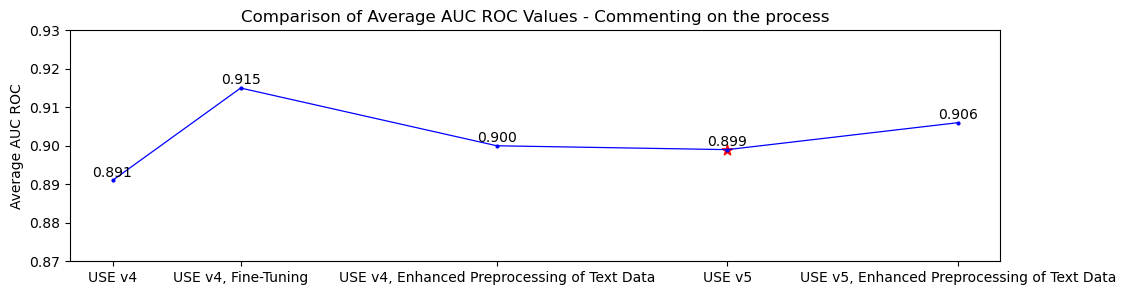

In [1]:
import matplotlib.pyplot as plt
labels = ['USE v4', 'USE v4, Fine-Tuning', 'USE v4, Enhanced Preprocessing of Text Data', 'USE v5', 'USE v5, Enhanced Preprocessing of Text Data']
values = [0.891, 0.915, 0.9, 0.899, 0.906]

x_values = [1, 1.5, 2.5, 3.4, 4.3]
plt.figure(figsize=(12, 3))
plt.plot(x_values, values, marker='o', color='blue', linestyle='-', linewidth=0.9, markersize=2)
plt.scatter(x_values[3], values[3], marker='*', color='red', s=60)  # s is the size of the marker

plt.title('Comparison of Average AUC ROC Values - Commenting on the process')
plt.ylabel('Average AUC ROC')
plt.xticks(x_values, labels)
plt.ylim(0.87, 0.93) # Setting the y-axis limit to better highlight the differences

for i, value in enumerate(values):
    plt.text(x_values[i], value + 0.001, f'{value:.3f}', ha='center')

plt.show()